## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Iris

It is the normal iris dataset.

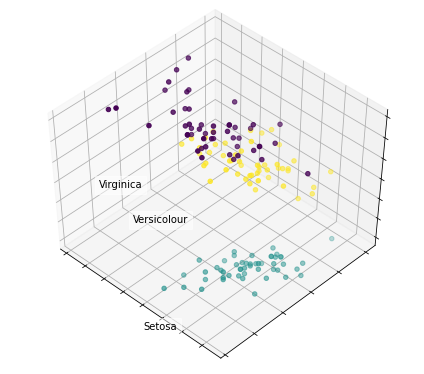

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [0]:
from sklearn.model_selection import train_test_split

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

### Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

In [4]:
from sklearn.tree import DecisionTreeClassifier
# 先從 depth = 3 開始試
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

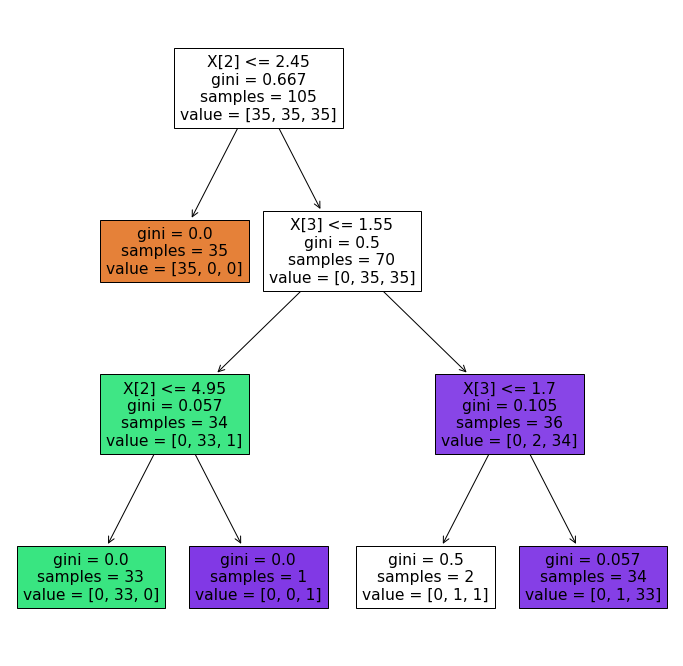

In [5]:
from sklearn import tree

plt.figure(figsize = (12, 12))
tree.plot_tree(dt,
               #feature_names = X_train.columns,
               #class_names = ['Setosa', 'Versicolour', 'Virginica'],
               filled = True)
plt.show()

In [6]:
train_acc = round(dt.score(X_train, y_train)*100, 2)
print("Training Accuracy: {} %".format(train_acc))

Training Accuracy: 98.1 %


In [0]:
# 對於 Depth = 3，雖然 Accuracy 很高，但在 leaf node 的地方卻出現了只有一兩個觀測值的情形，因此判斷可能有 overfitting 的情形，
# 故嘗試看看將 Depth 降為 2

In [8]:
# 將 Depth 改為 2 的 Decision Tree
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

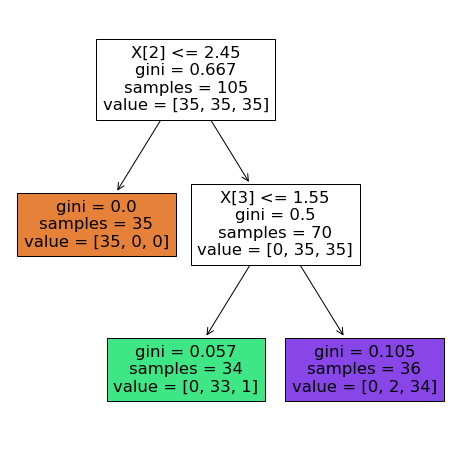

In [9]:
plt.figure(figsize = (8, 8))
tree.plot_tree(dt,
               #feature_names = X_train.columns,
               #class_names = ['Setosa', 'Versicolour', 'Virginica'],
               filled = True)
plt.show()

In [10]:
train_acc = round(dt.score(X_train, y_train)*100, 2)
print("Training Accuracy: {} %".format(train_acc))

Training Accuracy: 97.14 %


In [0]:
# 在 Depth = 2 的情形下，每個 leaf node 中的觀測值數量都夠多，可見應該沒有 overfitting 的問題產生。
# 且雖然 Accuracy 稍微下降了一些，但仍然夠高，因此選擇深度為 2 的模型作為最終模型！

### Question #2:

Predict the testing data. What is your accuracy_score?

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 預測 Test
y_pred = dt.predict(X_test)

# 計算 Accuracy
test_acc = round(accuracy_score(y_test, y_pred), 5)
print('Accuracy:', test_acc)

Accuracy: 0.88889


### Question #3:

Try to use PCA to reduce the dimensionality to 2. Use the entire iris dataset. (DO NOT use training/testing data.) Plot 2-d figure with PCA data and their labels.

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [14]:
import pandas as pd
pca_df = pd.DataFrame(X_pca)
pca_df["y"] = y
pca_df["y_label"] = pca_df["y"].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})
pca_df = pca_df.drop(["y"], axis = 1)
pca_df.columns = ["PC1", "PC2", "y"]
pca_df.head()

,PC1,PC2,y
0,-2.684126,0.319397,Setosa
1,-2.714142,-0.177001,Setosa
2,-2.888991,-0.144949,Setosa
3,-2.745343,-0.318299,Setosa
4,-2.728717,0.326755,Setosa


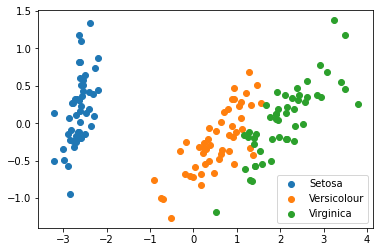

In [15]:
for category in ['Setosa', 'Versicolour', 'Virginica']:
    category_df = pca_df[pca_df["y"] == category]
    plt.scatter(category_df["PC1"], category_df["PC2"], label = category)
plt.legend()
plt.show()

### Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result? 

In [0]:
pca_y = pca_df["y"]
pca_X = pca_df.drop(["y"], axis=1)

In [0]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, pca_y, test_size=.3, random_state=42)

In [18]:
pca_dt = DecisionTreeClassifier(max_depth=2, random_state=42)
pca_dt.fit(pca_X_train, pca_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

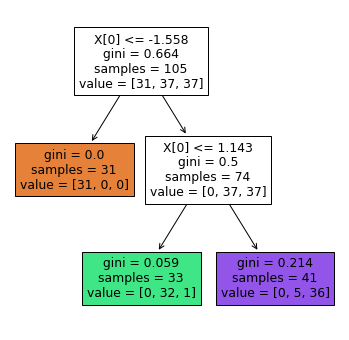

In [19]:
plt.figure(figsize = (6, 6))
tree.plot_tree(pca_dt, filled = True)
plt.show()

In [20]:
pca_y_pred = pca_dt.predict(pca_X_test)
pca_test_acc = round(accuracy_score(pca_y_test, pca_y_pred), 5)
print("Accuracy:", pca_test_acc)

Accuracy: 0.95556


### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination.  

**Answer:**

**在使用 PCA 進行維度縮減後，Accuracy 有明顯提升！**

**原因是因為主成份為原先所有變數的線性組合，因此對於前幾個主成份（解釋變異量高）來說，一個主成份就可以涵括幾乎所有變數的變異，因此在 Decision Tree 中，若是透過這些解釋變異量大的主成份來做分割，就等於幾乎把所有變數都納入考量了，因此準確率就會相對比較高。**

### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

Hint: PCA parameters, data preprocessing and feature engineering.

In [21]:
# 添加變數: 花萼長寬比 以及 花瓣長寬比
X_df = pd.DataFrame(X)
X_df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X_df["sepal_ratio"] = round(X_df["sepal_length"] / X_df["sepal_width"], 2)
X_df["petal_ratio"] = round(X_df["petal_length"] / X_df["petal_width"], 2)
X_df.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_ratio,petal_ratio
0,5.1,3.5,1.4,0.2,1.46,7.0
1,4.9,3.0,1.4,0.2,1.63,7.0
2,4.7,3.2,1.3,0.2,1.47,6.5
3,4.6,3.1,1.5,0.2,1.48,7.5
4,5.0,3.6,1.4,0.2,1.39,7.0


In [22]:
# 觀察加入新變數後，各個主成份解釋的總變異量變化
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca2 = PCA()
# 資料經過標準化才進入 PCA
pca2.fit_transform(StandardScaler().fit_transform(X_df))
print(pca2.explained_variance_ratio_)

[0.71869685 0.16972596 0.07750779 0.02918241 0.00337761 0.00150939]


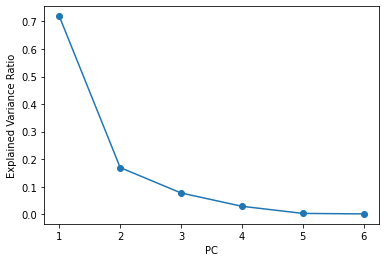

In [23]:
def plotData(data):
  x = [p[0] for p in data]
  y = [p[1] for p in data]
  plt.plot(x, y, '-o')

plotData(list(zip(range(1, len(X_df.columns)+1), pca2.explained_variance_ratio_)))
plt.xlabel("PC")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [0]:
# 由上圖可知，可以嘗試選擇三個主成份

In [0]:
# 再加入新變數並標準化後，選擇三個主成份
pca3 = PCA(n_components=3).fit_transform(X_df)

In [26]:
pca3_df = pd.DataFrame(pca3)
pca3_df["y"] = y
pca3_df["y_label"] = pca3_df["y"].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})
pca3_df = pca3_df.drop(["y"], axis = 1)
pca3_df.columns = ["PC1", "PC2", "PC3", "y"]
pca3_df.head()

,PC1,PC2,PC3,y
0,3.802299,-0.483929,0.296844,Setosa
1,3.796462,-0.518026,-0.241694,Setosa
2,3.523401,-0.982052,-0.118800,Setosa
3,4.222947,-0.267947,-0.336135,Setosa
4,3.836210,-0.528727,0.334912,Setosa


In [0]:
pca3_y = pca3_df["y"]
pca3_X = pca3_df.drop(["y"], axis=1)
pca3_X_train, pca3_X_test, pca3_y_train, pca3_y_test = train_test_split(pca3_X, pca3_y, test_size=.3, random_state=42)

In [28]:
pca3_dt = DecisionTreeClassifier(max_depth=2, random_state=42)
pca3_dt.fit(pca3_X_train, pca3_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

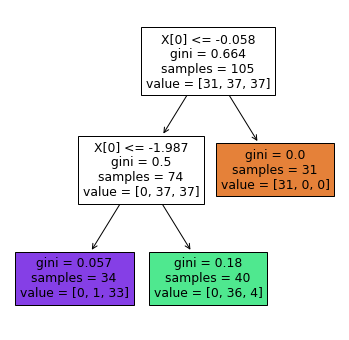

In [29]:
plt.figure(figsize=(6, 6))
tree.plot_tree(pca3_dt, filled=True)
plt.show()

In [30]:
pca3_y_pred = pca3_dt.predict(pca3_X_test)
pca3_test_acc = round(accuracy_score(pca3_y_test, pca3_y_pred), 5)
print("Accuracy:", pca3_test_acc)

Accuracy: 1.0


In [0]:
# 可看出最終 Test Data 的 Accuracy 有明顯提升！

## MNIST

Let's look at a famous handwritten numbers dataset.

In [0]:
digits = datasets.load_digits()
digi_X = digits.data
digi_y = digits.target

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

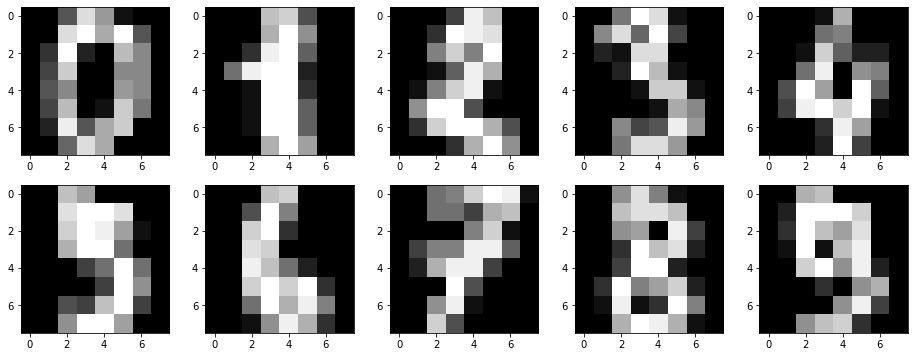

In [33]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i,:].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

In [34]:
pca_digi = PCA(n_components=2).fit_transform(digi_X)
pca_digi_df = pd.DataFrame(pca_digi)
pca_digi_df["y"] = digi_y
pca_digi_df.columns = ["PC1", "PC2", "y"]
pca_digi_df.head()

,PC1,PC2,y
0,-1.259467,21.274889,0
1,7.957609,-20.768690,1
2,6.991924,-9.955996,2
3,-15.906105,3.332472,3
4,23.306866,4.269054,4


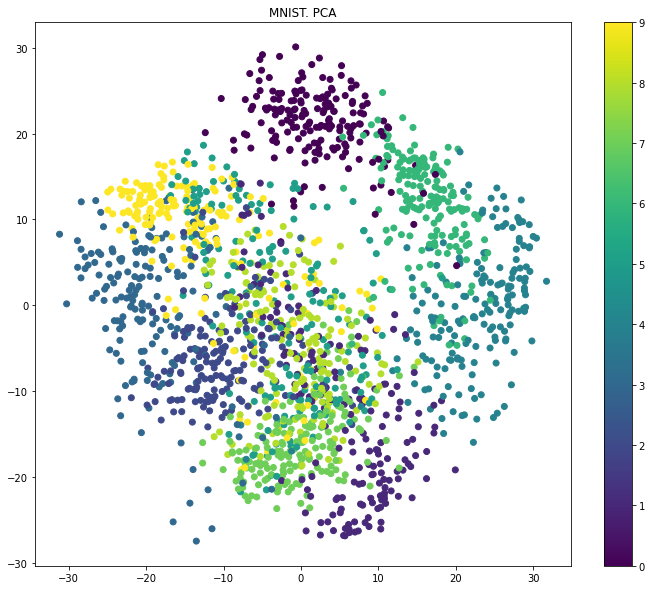

In [35]:
plt.figure(figsize=(12, 10))
#for category in range(10):
#category_df = pca_digi_df[pca_digi_df["y"] == category]
plt.scatter(pca_digi_df["PC1"], pca_digi_df["PC2"], c = pca_digi_df["y"])
plt.colorbar()
plt.title("MNIST. PCA")
plt.show()

### Question #8:

Why the figure looks bad? How many components would be better?

In [36]:
# 先觀察所有主成份的解釋總變異量
pca_digi_without_limit = PCA()
pca_digi_without_limit.fit_transform(digi_X)
print(pca_digi_without_limit.explained_variance_ratio_)

[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]


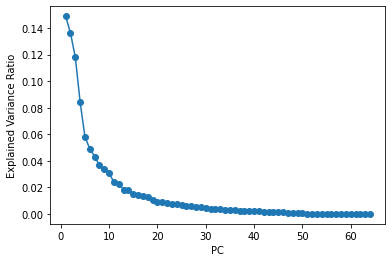

In [37]:
# 觀察所有主成份的解釋總變異量(圖形觀察)
def plotData(data):
  x = [p[0] for p in data]
  y = [p[1] for p in data]
  plt.plot(x, y, '-o')

plotData(list(zip(range(1, len(digi_X)+1), pca_digi_without_limit.explained_variance_ratio_)))
plt.xlabel("PC")
plt.ylabel("Explained Variance Ratio")
plt.show()

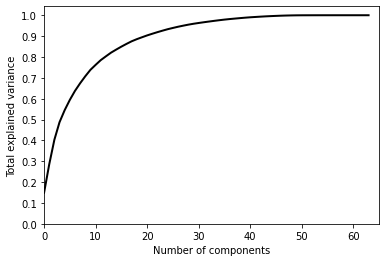

In [38]:
# 主成份的累計貢獻率
evr = pca_digi_without_limit.explained_variance_ratio_
tev = [0]*len(evr)
for i in range(len(evr)):
    if i == 0:
        tev[i] = evr[i]
    else:
        tev[i] = tev[i-1] + evr[i]
plt.plot(tev, c="black", linewidth=2)
plt.xlim(0,65)
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.yticks(np.arange(0, 1.1, .1))
plt.show()

In [39]:
print("若只選兩個主成份(二維)，則可以解釋的總變異僅為 {} %".format(round((evr[0] + evr[1])*100, 2)))

若只選兩個主成份(二維)，則可以解釋的總變異僅為 28.51 %


In [0]:
# 由上面結果得知，因為前兩個主成份僅能解釋總變異的 28%，因此若只有這兩個主成份，則無法解釋足夠的總變異，
# 才會導致上面散佈圖中資料點分不開的情形。
# 由主成份解釋變異量的圖形，以及累計貢獻率的圖形可以看出，至少要選大約 10 個主成份，才能解釋足夠的總變異量(70%)
# 若是想要模型解釋率更高一些，則可以選到 20 個主成份，這樣就可以解釋到大約 90% 的總變異。

### Bonus #1:

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42).fit_transform(digi_X)

tsne_df = pd.DataFrame(tsne)
tsne_df["y"] = digi_y
tsne_df.columns = ["1", "2", "y"]
tsne_df.head()

,1,2,y
0,61.356194,-7.714884,0
1,-19.206793,-24.675600,1
2,4.999533,-15.126944,2
3,17.872660,8.091484,3
4,-51.717979,-29.367254,4


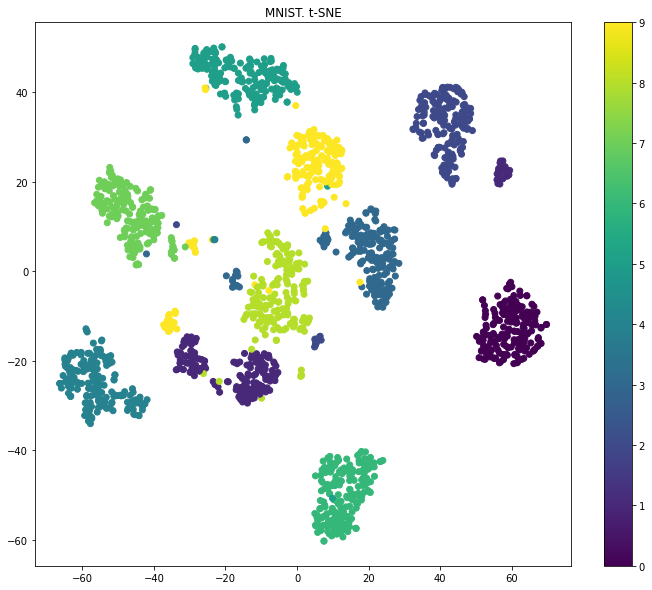

In [42]:
plt.figure(figsize=(12, 10))
plt.scatter(tsne_df["1"], tsne_df["2"], c = tsne_df["y"])
plt.colorbar()
plt.title("MNIST. t-SNE")
plt.show()

In [0]:
# TSNE 在低維的部分使用 t 分配，因為 t 分配的長尾部分較厚，因此對於高維度中距離較近的點，
# 在低維的映射後，點與點之間能保持較大的距離，如此便比較不會產生 PCA 那樣樣本點擁擠的問題。

## Hierarchical Clustering

Here is an example of Hierarchical Clustering.

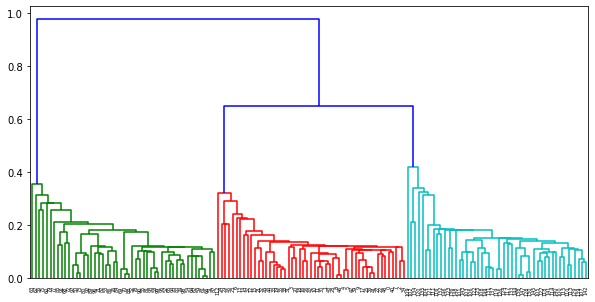

In [44]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

h_X = np.zeros((150, 2))

np.random.seed(seed=42)
h_X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
h_X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

h_X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
h_X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

h_X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
h_X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(h_X) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question #9:

Try to cluster iris data using the above codes. Show misclustered data points.

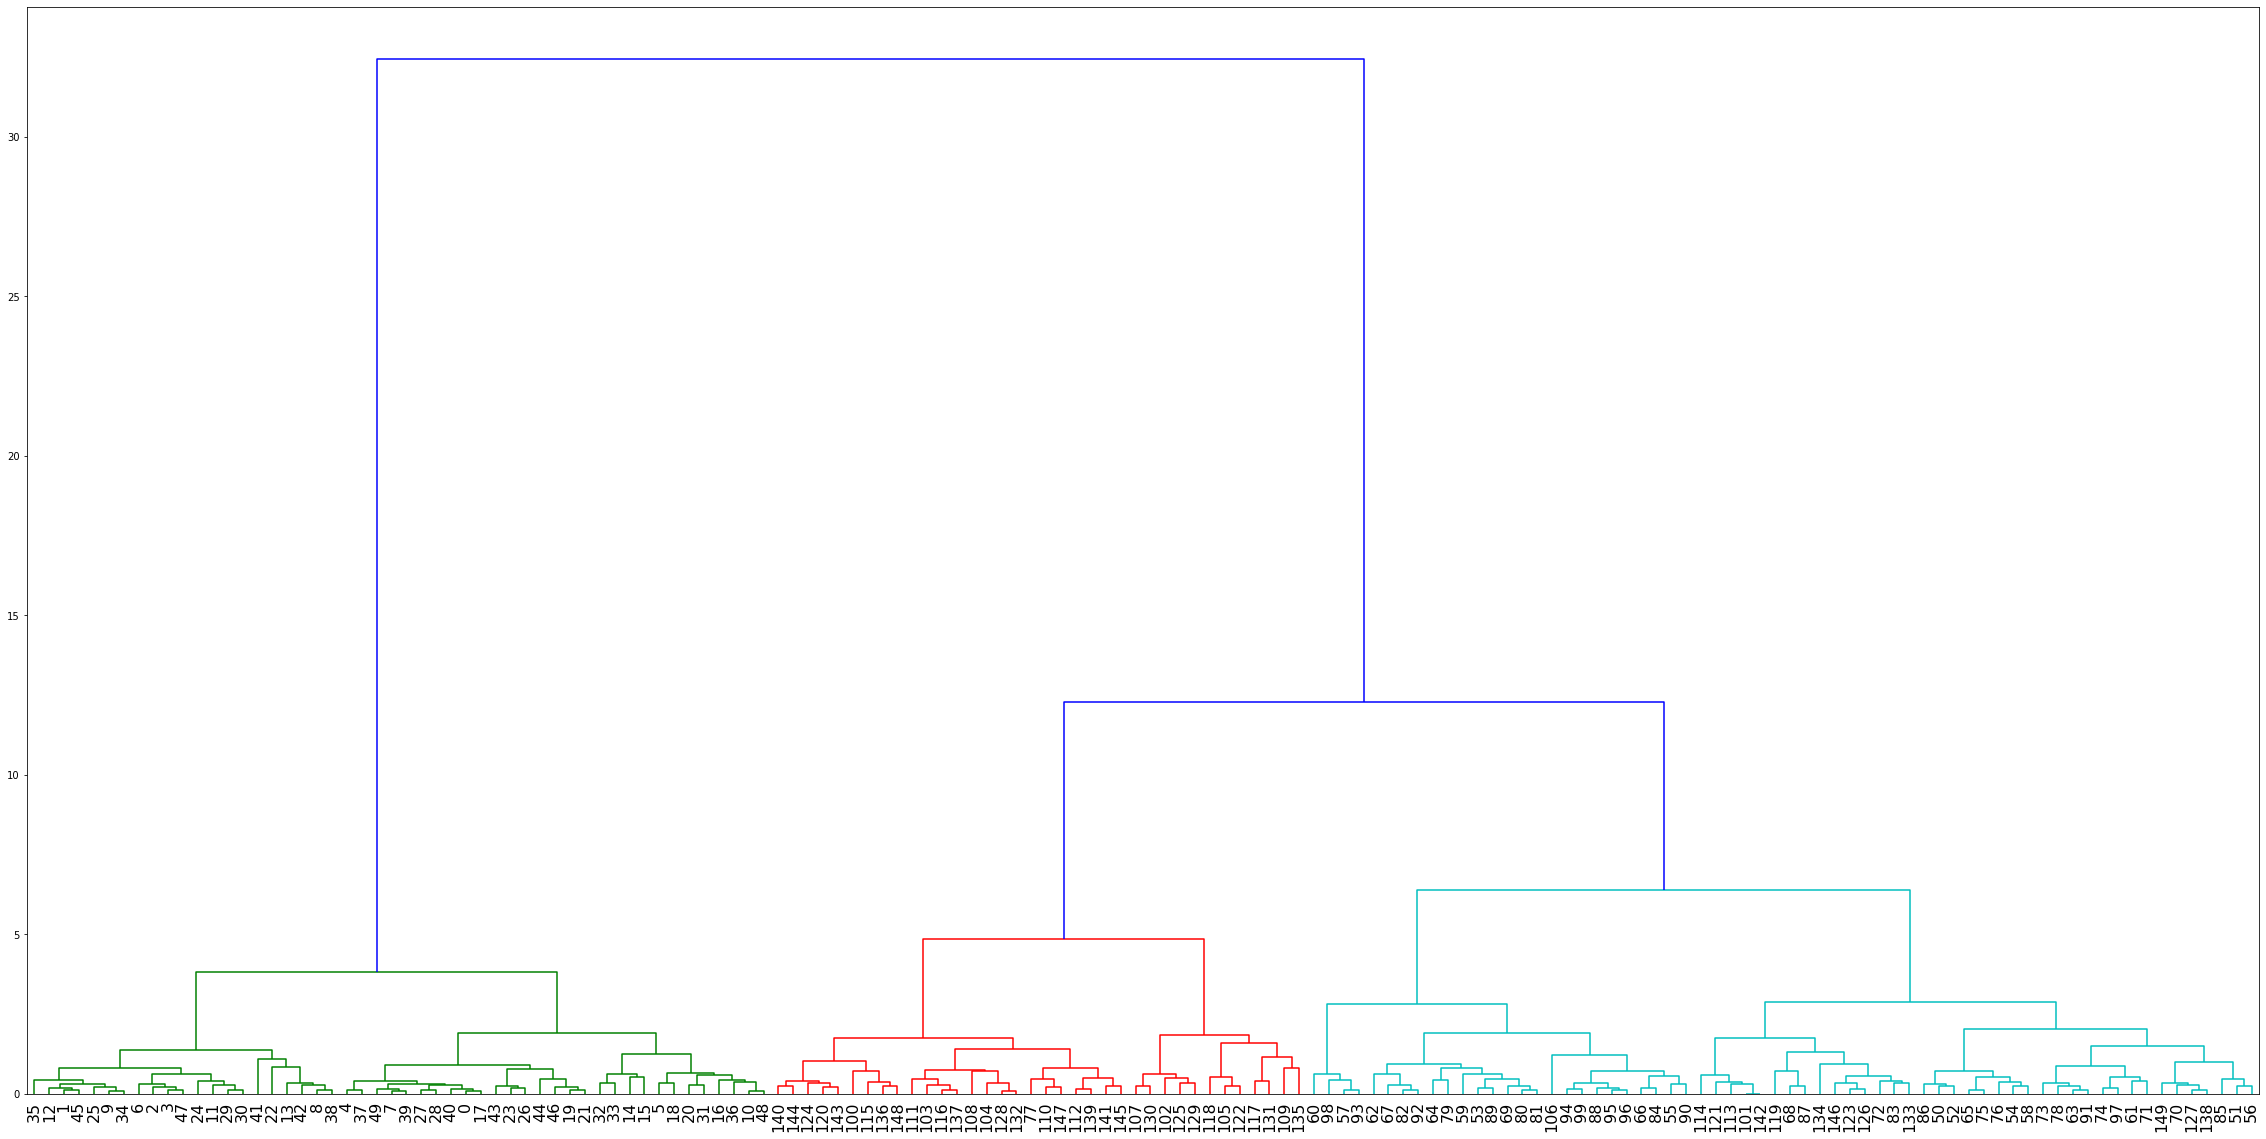

In [45]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'ward') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(40, 20))
# 因為 iris data 的 target 為三類，因此 threshold 切在 10 的位置
dn = hierarchy.dendrogram(Z, color_threshold=10, leaf_rotation=90, leaf_font_size=16)
#plt.axhline(y=10, c='black', linewidth=3)
plt.show()

In [46]:
print(y[:50])
print(y[50:100])
print(y[100:150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [0]:
# 從圖中可以看出 index 77, 106, 114, 121, 113, 101, 142, 119, 134, 146, 123, 126, 133, 149, 127, 138 為分類錯誤的樣本點！